In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [2]:
#Time=GMST['time']
#Control=['xnagb','xnage','xnagh']#['xnagd','xnagf','xnagg']
Forced=['xnagd','xnagf','xnagg']#['xnagb','xnage','xnagh']
Forced_LGM=['xmzke','xmzkg','xmzkh']
LGM_pm = ['xmzkb','xmzkc']
LGM_forc= ['LGM_forc']
PI_forc = ['pi_forc']

In [59]:
EXP = 'EXP02/'
conf = '_conf2'

In [66]:
df_abs=pd.DataFrame()
df_an=pd.DataFrame()
df_abs_list=[]
df_an_list=[]
df_names=[]
for dat in LGM_forc:#+LGM_forc+LGM_pm:#Forced+PI_forc+Forced_LGM+LGM_forc+LGM_pm:
    df_names.append(dat)
    df_abs_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_abs.csv',
                                   converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    df_an_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_an.csv',
                                  converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    
for dat in LGM_pm:#Forced+PI_forc+Forced_LGM+LGM_forc+LGM_pm:
    df_names.append(dat)
    df_abs_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_abs.csv',
                                   converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    df_an_list.append(pd.read_csv('../Data/Optimizations_HadCM3/'+EXP+dat+conf+'_an.csv',
                                  converters=dict(zip([1,2,3,4,6,7],[lambda d: np.array(eval(d.replace('nan', 'np.nan')))
                                                     if 'nan' in d else np.array(eval(d))]*7))))
    
df_abs = pd.concat(df_abs_list,keys=df_names)
df_an = pd.concat(df_an_list,keys=df_names)

In [67]:
df_abs#.loc['xmzkb','P'].iloc[-1]

Unnamed: 0                                                  F  \
LGM_forc 0            0  [243.56297100195238, 243.56614340003415, 243.5...   
         1            1  [243.55816743811297, 243.56133969288385, 243.5...   
         2            2  [245.47864052486355, 245.4815980056676, 245.47...   
         3            3  [221.0841376545977, 221.08660433447997, 221.08...   
         4            4  [219.56623890922313, 219.56868452156348, 219.5...   
         5            5  [218.28690062799703, 218.28932693774485, 218.2...   
         6            6  [216.0579436100152, 216.06033988764452, 216.05...   
         7            7  [196.10891267022592, 196.1111529599238, 196.10...   
         8            8  [195.94776206604433, 195.95022194414838, 195.9...   
         9            9  [187.9724857817088, 187.9747102110907, 187.970...   
         10          10  [187.37813939905396, 187.38036543294209, 187.3...   
         11          11  [186.8726768969293, 186.87490212472872, 186.87...   
         12          12  [185.48343288904098, 185.4856587458066, 185.48...   
         13          13  [275.1623645402774, 275.16594143288785, 275.15...   
         14          14  [275.4801419439591, 275.48292370668867, 275.47...   
         15          15  [151.35958253383012, 151.36005097448512, 151.3...   
         16          16  [174.98282327152154, 174.98353084124298, 174.9...   
         17          17  [151.03525675864864, 151.0357392222646, 151.03...   
         18          18  [151.00782815825255, 151.00831122342342, 151.0...   
         19          19  [150.99649225213452, 150.9969765988921, 150.99...   
xmzkb    0            0  [367.12017705812326, 367.1146685550859, 367.12...   
         1            1  [367.1198495104554, 367.11434100906513, 367.12...   
         2            2  [288.0281838376237, 288.0251148816093, 288.031...   
         3            3  [287.8288064304935, 287.825749767644, 287.8318...   
         4            4  [287.7814537563487, 287.77840095221904, 287.78...   
         5            5  [287.7333240566812, 287.73027518834886, 287.73...   
         6            6  [287.685461352005, 287.68241641134057, 287.688...   
         7            7  [287.63785498565096, 287.6348139662569, 287.64...   
         8            8  [287.59050710256673, 287.5874699964904, 287.59...   
         9            9  [287.5434192338315, 287.5403860335477, 287.546...   
         10          10  [287.4965887535916, 287.4935594517206, 287.499...   
         11          11  [287.45000204126694, 287.44697663113595, 287.4...   
         12          12  [287.40368144185425, 287.4006599150975, 287.40...   
         13          13  [287.35760632725453, 287.3545886768666, 287.36...   
         14          14  [287.3117852777376, 287.30877149660466, 287.31...   
         15          15  [287.26620788180816, 287.2631979622035, 287.26...   
         16          16  [287.22087985416067, 287.21787378855134, 287.2...   
         17          17  [287.17580167430975, 287.17279945556805, 287.1...   
         18          18  [287.1309543581684, 287.12795597988514, 287.13...   
         19          19  [287.086365158889, 287.083370612065, 287.08935...   
xmzkc    0            0                [nan, nan, nan, nan, nan, nan, nan]   
         1            1                [nan, nan, nan, nan, nan, nan, nan]   
         2            2                [nan, nan, nan, nan, nan, nan, nan]   
         3            3                [nan, nan, nan, nan, nan, nan, nan]   
         4            4                [nan, nan, nan, nan, nan, nan, nan]   
         5            5                [nan, nan, nan, nan, nan, nan, nan]   
         6            6                [nan, nan, nan, nan, nan, nan, nan]   
         7            7                [nan, nan, nan, nan, nan, nan, nan]   
         8            8                [nan, nan, nan, nan, nan, nan, nan]   
         9            9                [nan, nan, nan, nan, nan, nan, nan]   
         10          10            

In [6]:
Lat_10,ZMT_ERA_an=np.loadtxt('../Data/ERA5_Data/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')
Lat_10,ZMT_ERA_abs=np.loadtxt('../Data/ERA5_Data/ERA_1961_1990_10deg_ZMT.txt')
Lat_10,ZMT_HadCM3_LGM_abs=np.loadtxt('../Data/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,ZMT_HadCM3_LGM_an=np.loadtxt('../Data/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')

In [7]:
HadCM3_ZMT=pd.read_csv('Experiments/HadCM3/HadCM3_ZMT_10deg.csv')
HadCM3_ZMT_anomaly=pd.read_csv('Experiments/HadCM3/HadCM3_ZMT_anomaly_10deg.csv')
HadCM3_GMT=pd.read_csv('Experiments/HadCM3/HadCM3_850.csv')
HadCM3_GMT_anomaly=pd.read_csv('Experiments/HadCM3/HadCM3_850_anomaly.csv')

Time_CESM,Target_CESM_t=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_CESM,Target_CESM_dt=np.loadtxt('Experiments/CESM/CESM_850_1850_response_detrend.txt',delimiter=',')
Time_Pages,Target_Pages_t=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')
Time_Pages,Target_Pages_dt=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850_detrend.txt',delimiter=',')


In [49]:
HadCM3_ZMT_anomaly

,lat,xnagb,xnage,xnagd,xnagf,xnagg,xmzke,xmzkg,xmzkh,xmzkb,xmzkc,pi_ctrl,pi_forc,LGM_forc
0,-85.0,-57.234818,-57.374252,-57.831924,-58.069168,-58.362610,-67.987167,-67.969269,-68.233627,-68.793381,-68.297852,-57.304535,-58.087901,-68.063354
1,-75.0,-49.196152,-49.301117,-49.693756,-50.061691,-49.616196,-51.442078,-51.338531,-51.755264,-52.564804,-51.624680,-49.248634,-49.790548,-51.511958
2,-65.0,-21.169983,-21.224487,-21.366760,-21.541321,-21.451385,-22.722687,-22.329010,-22.903015,-24.691330,-22.476440,-21.197235,-21.453156,-22.651571
3,-55.0,-11.174103,-11.244324,-11.341125,-11.350708,-11.306854,-10.198792,-9.897186,-10.361481,-11.016357,-10.197388,-11.209213,-11.332896,-10.152486
4,-45.0,-5.032959,-4.963501,-4.928467,-4.800934,-4.802399,-2.578247,-2.177429,-2.443939,-2.234253,-2.571075,-4.998230,-4.843933,-2.399872
5,-35.0,2.935059,2.902649,2.968597,3.105469,3.162445,5.919281,5.889832,5.917969,6.602966,5.666351,2.918854,3.078837,5.909027
6,-25.0,7.569580,7.422852,7.365234,7.552643,7.503815,10.594391,10.322815,10.341461,11.199036,10.066559,7.496216,7.473897,10.419556
7,-15.0,10.646088,10.347656,10.603943,10.518341,10.564117,13.406097,13.151794,13.195923,13.913330,13.032990,10.496872,10.562134,13.251272
8,-5.0,13.046112,12.853882,13.064117,12.908691,12.966003,15.607452,15.345642,15.255737,16.083984,15.131500,12.949997,12.979604,15.402944
9,5.0,13.532959,13.356049,13.512756,13.319031,13.456085,16.062805,15.950012,15.759613,16.713623,15.716766,13.444504,13.429291,15.924143


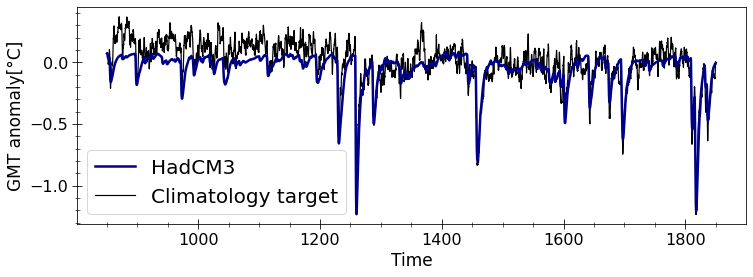

In [12]:
plt.figure(figsize=(12,4))
plt.plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_an'][:,2],color='darkblue',label='HadCM3',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(Time_HadCM3,Target_HadCM3_LGM,'k',label='Climatology target',linewidth=1.2)
#plt.xscale('latarea')
plt.xlabel('Time',fontsize=17)
plt.ylabel('GMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [100]:
from matplotlib import colors
cols=np.array(['darkblue','blue','dodgerblue','lightblue',
               'darkviolet','violet',
               'darkgreen','limegreen',
               'darkorange','moccasin'])
cols_rgb=[colors.hex2color(colors.cnames[cols[i]]) for i in range(len(df_names))]
cols_rgb_dic={df_names[i]: colors.hex2color(colors.cnames[cols[i]]) for i in range(len(df_names))}
parameter_labels=['c_ao [m]','a [$Wm^{-2}$]','b [$Wm^{-2}K^{-1}$]','factor_oc','factor_kwv','factor_kair']


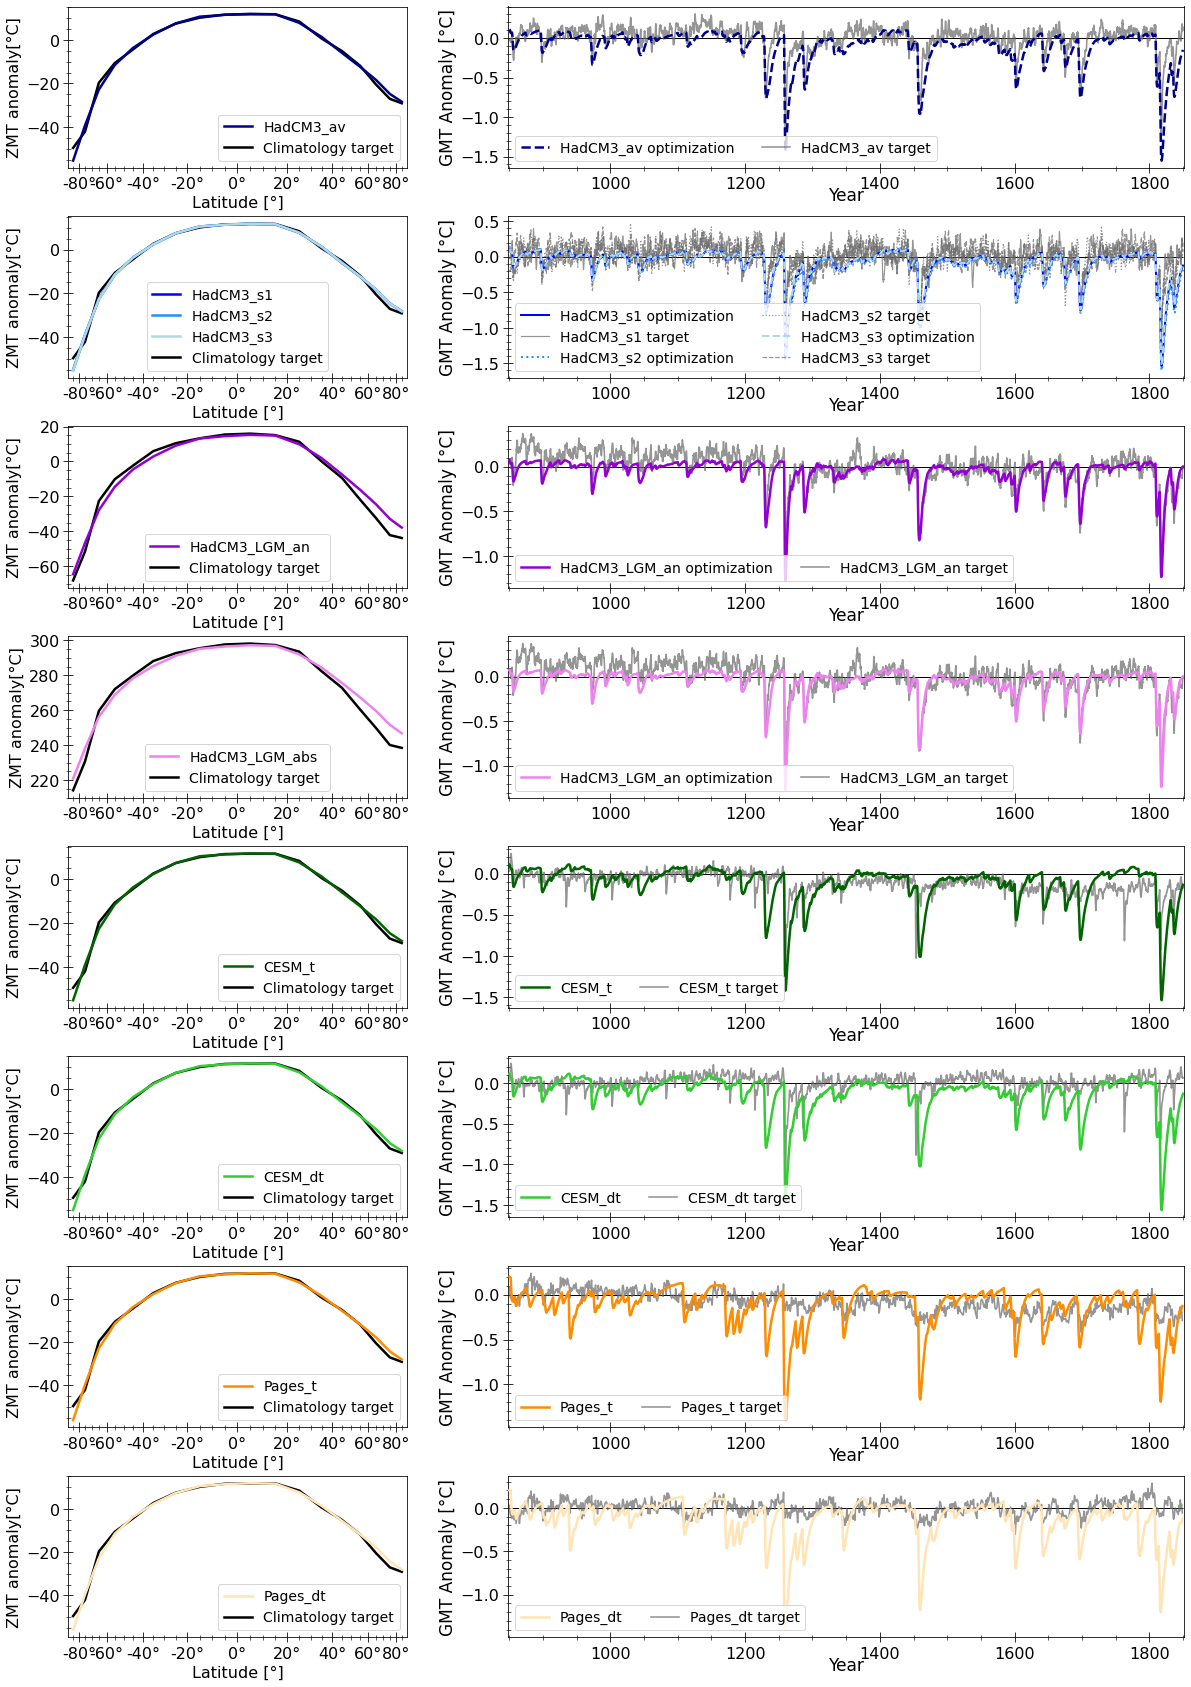

In [17]:
fig=plt.figure(figsize=(20,30))
gs = gridspec.GridSpec(8, 2, width_ratios=[1, 2]) 
ax=np.array([[plt.subplot(gs[i,0]),plt.subplot(gs[i,1])] for i in range(8)])

ax[0,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_av'][:,-1],color=cols_rgb[0],label='HadCM3_av',zorder=5)
ax[0,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s1'][:,-1],color=cols_rgb[1],label='HadCM3_s1',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s2'][:,-1],color=cols_rgb[2],label='HadCM3_s2',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_s3'][:,-1],color=cols_rgb[3],label='HadCM3_s3',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[2,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_an'][:,-1],color=cols_rgb[4],label='HadCM3_LGM_an',zorder=5)
ax[2,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_an,'k',label='Climatology target ',zorder=-1)

ax[3,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['HadCM3_LGM_abs'][:,-1],color=cols_rgb[5],label='HadCM3_LGM_abs',zorder=5)
ax[3,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3_LGM_abs,'k',label='Climatology target ',zorder=-1)

for i in [6,7,8,9]:
    ax[i-2,0].plot(np.deg2rad(Lat_10),data_dict_ZMT[dict_names[i]][:,-1],color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i-2,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""ax[5,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['CESM_dt'][:,-1],color=cols_rgb[5],label='CESM_dt',zorder=5)
ax[5,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[6,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_t'][:,-1],color=cols_rgb[6],label='Pages_t',zorder=5)
ax[6,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

ax[7,0].plot(np.deg2rad(Lat_10),data_dict_ZMT['Pages_dt'][:,-1],color=cols_rgb[7],label='Pages_dt',zorder=5)
ax[7,0].plot(np.deg2rad(Lat_10),ZMT_ERA_an,'k',label='Climatology target',zorder=-1)

"""
ax[0,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_av'][:,-1],linewidth=2.5,alpha=1,linestyle='--',
             color=cols_rgb[0],label='HadCM3_av optimization',zorder=5)
ax[0,1].plot(Time_HadCM3,Target_HadCM3_av,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_av target')

ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s1'][:,-1],linewidth=2.0,alpha=1,color=cols_rgb[1]
             ,label='HadCM3_s1 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s1,color='dimgray',linewidth=1.2,alpha=.7
             , label='HadCM3_s1 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s2'][:,-1],linewidth=2.0,alpha=1,linestyle=':',color=cols_rgb[2]
             ,label='HadCM3_s2 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s2,color='dimgray',linewidth=1.2,alpha=.7,linestyle=':'
             ,label='HadCM3_s2 target')
ax[1,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_s3'][:,-1],linewidth=2.0,alpha=1,linestyle='--',color=cols_rgb[3]
             ,label='HadCM3_s3 optimization',zorder=5)
ax[1,1].plot(Time_HadCM3,Target_HadCM3_s3,color='dimgray',linewidth=1.2,alpha=.7,linestyle='--'
             ,label='HadCM3_s3 target')

ax[2,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_an'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[4],label='HadCM3_LGM_an optimization',zorder=5)
ax[2,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_an target')

ax[3,1].plot(Time_HadCM3,data_dict_GMT['HadCM3_LGM_abs'][:,1],linewidth=2.5,alpha=1,color=cols_rgb[5],label='HadCM3_LGM_an optimization',zorder=5)
ax[3,1].plot(Time_HadCM3,Target_HadCM3_LGM,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3_LGM_abs target')

for i in [6,7,8,9]:
    ax[i-2,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT[dict_names[i]][:,-1],linewidth=2.5,alpha=1,color=cols_rgb[i],label=dict_names[i],zorder=5)
    ax[i-2,1].plot(data_dict_GMT_time[dict_names[i]],data_dict_GMT_target[dict_names[i]],color='dimgray',linewidth=1.6,alpha=.7, label=dict_names[i]+' target')

"""ax[5,1].plot(Time_CESM,data_dict_GMT['CESM_dt'][:,-1],linewidth=2.5,alpha=1,color='darkgreen',label='CESM_dt optimization',zorder=5)
ax[5,1].plot(Time_CESM,Target_CESM_dt,color='dimgray',linewidth=1.6,alpha=.7, label='CESM_dt target')

ax[6,1].plot(Time_Pages,data_dict_GMT['Pages_t'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_t optimization',zorder=5)
ax[6,1].plot(Time_Pages,Target_Pages_t,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_t target')

ax[7,1].plot(Time_Pages,data_dict_GMT['Pages_dt'][:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k_dt optimization',zorder=5)
ax[7,1].plot(Time_Pages,Target_Pages_dt,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k_dt target')
"""
for i in range(8):
    ax[i,0].set_xscale('latarea')
    ax[i,0].set_xlabel('Latitude [°]',fontsize=16)
    ax[i,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
    ax[i,0].legend(fontsize=14)

    ax[i,1].set_xlim(848,1852)
    ax[i,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
    ax[i,1].set_xlabel('Year',fontsize=17,labelpad=-5)
    ax[i,1].legend(fontsize=14,loc='lower left',ncol=2)
    ax[i,1].hlines(0,850,1850,linewidth=1)

plt.subplots_adjust(hspace=0.3)

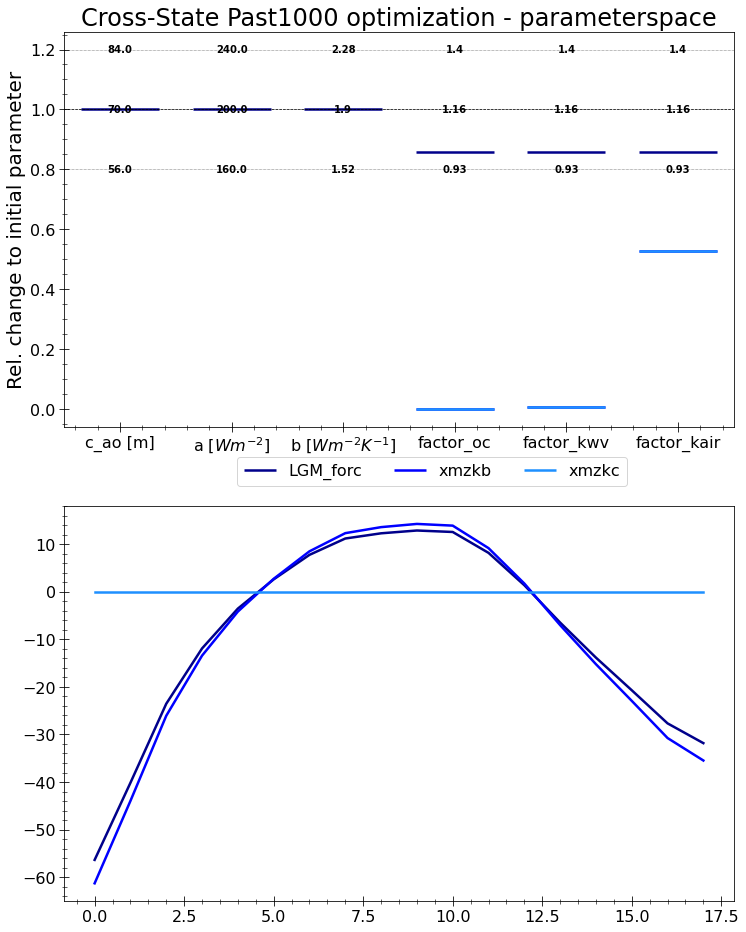

In [106]:
fig,ax = plt.subplots(2,1,figsize=(12,16))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
#all_paras=dict()#np.array([[data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0] for i in data_dict_P] for k in range(6)])
#HadCM3_labels=['HadCM3_av','HadCM3_s1','HadCM3_s2','HadCM3_s3','HadCM3_LGM_abs','HadCM3_LGM_an']

#all_paras={i: [data_dict_P[i][k,-1]/4.2e6 if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0]/4.2e6 if k==0
#               else data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,0] for k in range(6)] for i in data_dict_P}
#all_paras={i: [data_dict_P[i][k,-1] if i in ['HadCM3_LGM_abs','HadCM3_LGM_an'] else data_dict_P[i][k,-1] for k in range(6)] for i in data_dict_P}
#all_paras=all_paras[0]/4.2e6


#for run in df_names:
step= 0
for run in LGM_forc:
    for p in range(6):
        if p==0:
            ax[0].eventplot(np.vstack(df_an['P'].loc[run,step])[p]/P0[p]/4.2e6,orientation='vertical',lineoffsets=p,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run],label=run)
        else:

            ax[0].eventplot(np.vstack(df_an['P'].loc[run,step])[p]/P0[p],orientation='vertical',lineoffsets=p,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run])
for run in LGM_pm:
    for p in range(3):
        if p==0:
            ax[0].eventplot(np.vstack(df_an['P'].loc[run,step])[p]/P0[p]/4.2e6,orientation='vertical',lineoffsets=p+3,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run],label=run)
        else:

            ax[0].eventplot(np.vstack(df_an['P'].loc[run,step])[p]/P0[p],orientation='vertical',lineoffsets=p+3,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[run])

            
ax[0].hlines(1,-1,6,linewidth=0.7,linestyle='--')
ax[0].set_xlim(-0.5,5.5)
#plt.ylim(0.89,1.16)
for h in [0.8,1,1.2]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        ax[0].text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    ax[0].hlines(h,-1,6,linewidth=0.5,linestyle=':')
ax[0].set_xticks(np.arange(6))
ax[0].set_xticklabels(parameter_labels)
ax[0].set_ylabel('Rel. change to initial parameter')
ax[0].set_title('Cross-State Past1000 optimization - parameterspace')
fig.legend(loc='lower center',ncol=4,bbox_to_anchor=(0.5,0.38),fontsize=16)


for run in LGM_forc+LGM_pm:
    ax[1].plot(df_an.loc[run,'ZMT'][step],linewidth=2.5,c=cols_rgb_dic[run])#,label=run)
    
#print(Pmin/P0)
#print(Pmax/P0)

In [120]:
np.vstack(df_abs['F'].loc['pi_forc'])[:,0]

array([113.63092327, 113.61632813, 147.50309717, 110.24555291,
       102.49415867,  71.76822255,  70.76447047,  70.29118838,
        70.12688187,  70.09636543, 179.08083018, 317.876038  ,
       204.3419264 , 157.45710546,  76.99731773,  75.6198048 ,
        74.07338209,  73.70881389,  56.47548556,  49.84194171])

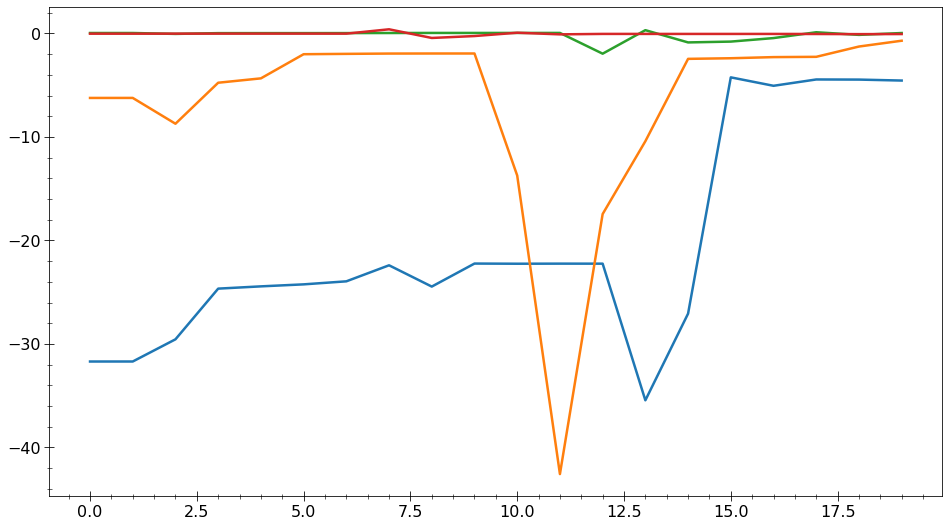

In [134]:
for var in LGM_forc+PI_forc+LGM_pm:
    plt.plot(np.vstack(np.array(df_abs.loc[var,'dF']))[:,0])
#plt.yscale('log')

In [7]:
plt.figure(figsize=(12,12))
P0=np.array([70,200,1.9,1.165,1.165,1.165])
Pmin=np.array([1,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100,240,2.5,1.3,1.3,1.3])
#all_paras=np.array([[list(data_dict_P.values())[i][k,0] for i in range(10)] for k in range(6)])
#all_paras[0]=all_paras[0]/4.2e6
Model_labels=['HadCM3_av','HadCM3_s1','HadCM3_s2','HadCM3_s3','CESM_t','CESM_dt',
       'Pages_t','Pages_dt']

for k in range(6):
    for i in Model_labels:
        if k==0:
            plt.eventplot([all_paras[i][k]/P0[k]/4.2e6],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[i],label=i)
        else:
            
            plt.eventplot([all_paras[i][k]/P0[k]],orientation='vertical',lineoffsets=k,
                          linelengths=0.7,linewidth=2.5,colors=cols_rgb_dic[i])
plt.hlines(1,-1,6,linewidth=0.7,linestyle='--')
plt.xlim(-0.5,5.5)
#plt.ylim(0.88,1.13)
for h in [0.9,1,1.1]:#[0.6,0.8,1,1.2,1.4]:#
    for i in range(6):
        plt.text(i,h,str(np.round(h*P0[i],2)),horizontalalignment='center',verticalalignment='center',fontweight='bold')
    plt.hlines(h,-1,6,linewidth=0.5,linestyle=':')
plt.xticks(np.arange(6),parameter_labels)
plt.ylabel('Rel. change to initial parameter')
plt.title('Cross-target Past1000 optimization - parameterspace')
plt.legend(loc='center right',bbox_to_anchor=(1.32,0.5),fontsize=16)
#plt.savefig('../Latex/Figures/Cross_target_optim.png',dpi=400,transparent=True,bbox_inches='tight')

NameError: name 'all_paras' is not defined

<Figure size 864x864 with 0 Axes>

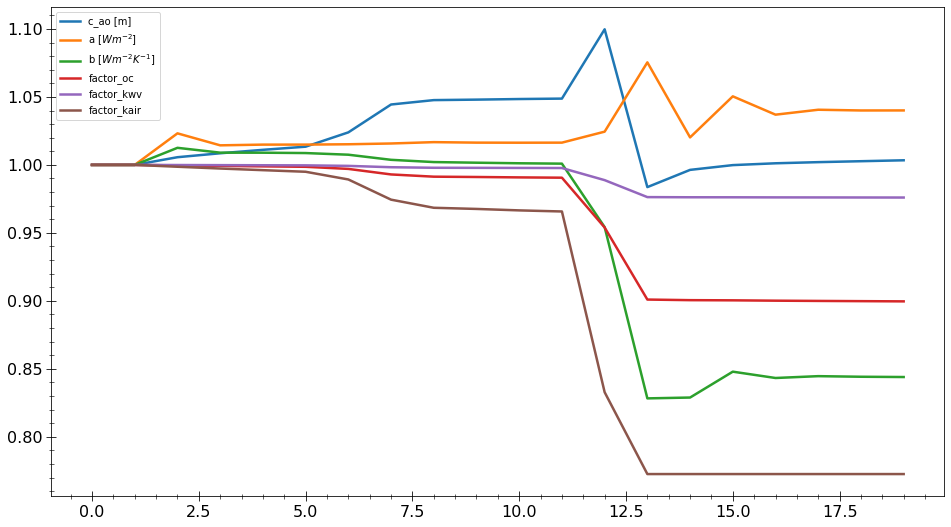

In [8]:
for i in range(6):
    if i==0:
        plt.plot(data_dict_P['HadCM3_LGM_abs'][0]/P0[0]/4.2e6,label=parameter_labels[0])
    else:
        plt.plot(data_dict_P['HadCM3_LGM_abs'][i]/P0[i],label=parameter_labels[i])
plt.legend()

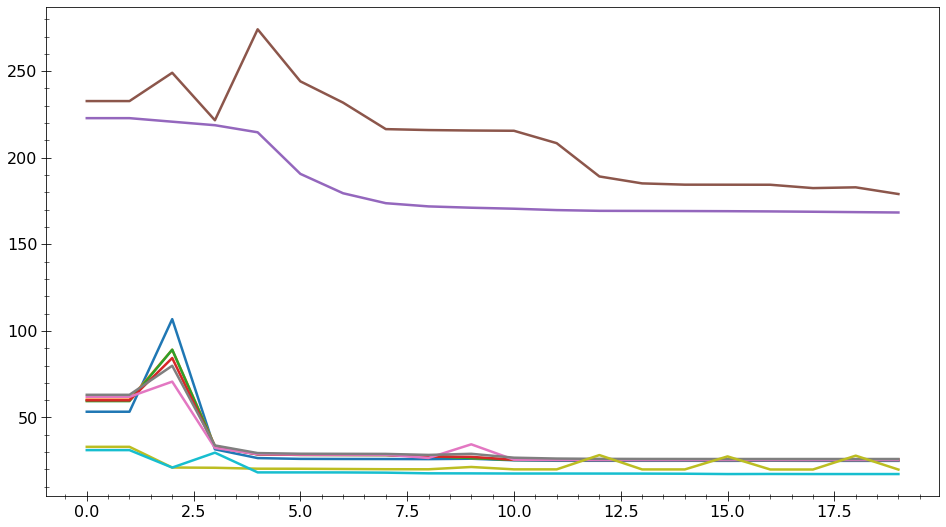

In [80]:
for i in range(10):
    plt.plot(data_dict_F[dict_names[i]][0])
#plt.yscale('log')